In [12]:
from pprint import pprint
import matplotlib.pyplot as plt
import math
import numpy as np

%matplotlib inline

In [3]:
class PID(object):
    def __init__(self, dState=0, iState=0, iMin=0, iMax=100, Kp=1, Ki=1, Kd=1):
        self.dState = dState  # Last position input
        self.iState = iState  # Integrator state
        self.iMin   = iMin    # minimum allowable integrator state
        self.iMax   = iMax    # maximum allowable integrator state
        self.Kp     = Kp      # proportional gain
        self.Ki     = Ki      # integral gain
        self.Kd     = Kd      # derivative gain

In [4]:
def updatePID(pid, error, position):
    
    #proportional term
    p = pid.Kp * error
    
    # calculate the integral state with appropriate limiting
    pid.iState += error
    if pid.iState > pid.iMax:
        pid.iState = pid.iMax
    elif pid.iState < pid.iMin:
        pid.iState = pid.iMin
    
    i = pid.Ki * pid.iState
    
    #derivative term
    d = pid.Kd * (pid.dState - position)
    pid.dState = position
    
    return p + i + d    

In [5]:
def newtonsLawOfCooling(T_0=27.1, k=1):
    return lambda x: T_0 + (x - T_0)*math.exp(-k)

In [27]:
def humidityfunct(k):
    return lambda x: x + k

In [26]:
def CO2funct(k):
    return lambda x: x + k

In [8]:
def plantsys(u_t, measured, plant_process):
    return plant_process(measured + u_t)

In [7]:
newtonsLawOfCooling()(27)

27.063212055882857

In [20]:
test = PID()

In [29]:
pprint(test.__dict__, width=1)

{'Kd': 1,
 'Ki': 1,
 'Kp': 1,
 'dState': 12,
 'iMax': 100,
 'iMin': 0,
 'iState': 12}


### Setup

In [66]:
tempPID = PID(Kp=0.2, Ki=0.1, Kd=0.05)
humiPID = PID(Kp=0.2, Ki=0.1, Kd=0.05)
CO2PID = PID(Kp=0.2, Ki=0.1, Kd=0.05)

temperature, humidity, CO2 = range(3)

PID3      = [tempPID, humiPID, CO2PID]
desired  = np.array([23.9, 50, 500])
measured = np.array([20, 33, 700])
plant_process = [newtonsLawOfCooling(k=0.01), humidityfunct(k=3.0), CO2funct(2.0)]

### Simulate

In [67]:
T = [measured]

for i in range(100):
    error = desired - measured
    u_t = [updatePID(PID3[i], error[i], measured[i]) for i in range(3)]
    measured = [plantsys(u_t[i], measured[i], plant_process[i]) for i in range(3)]
    #print(measured)
    T.append(measured)
T = np.array(T)

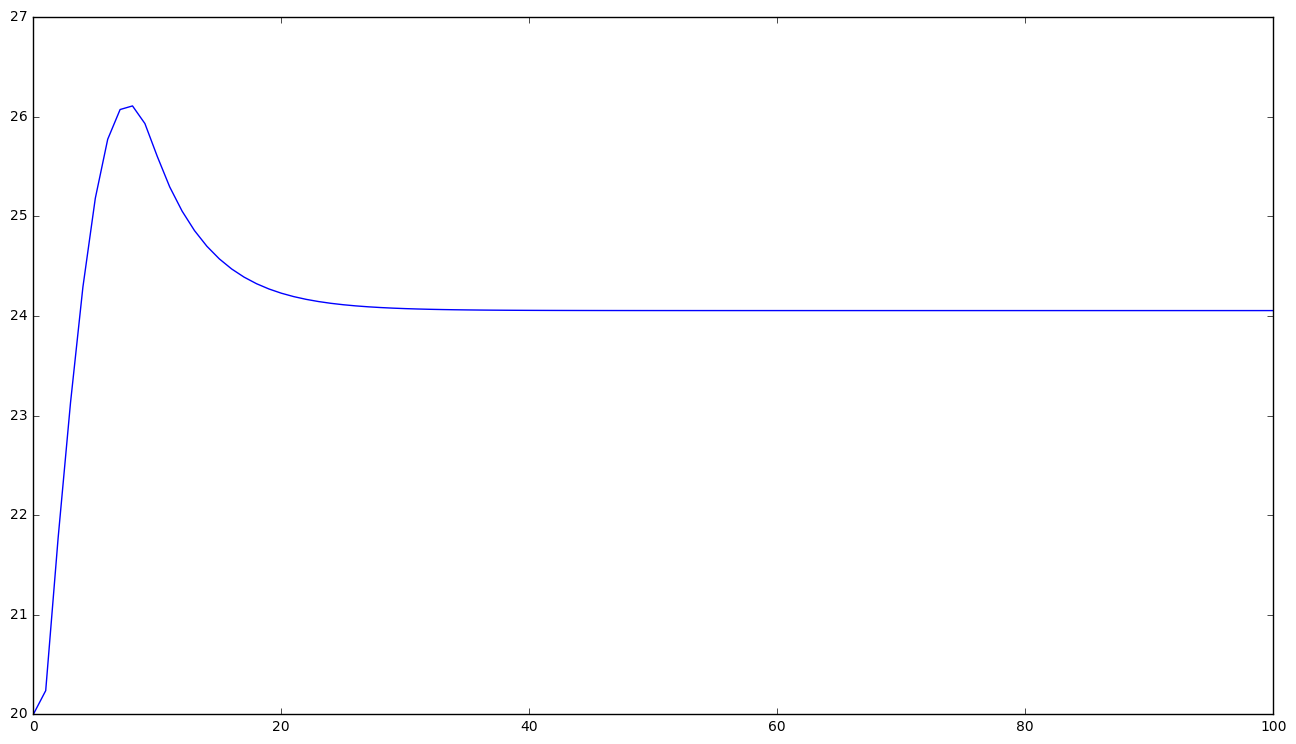

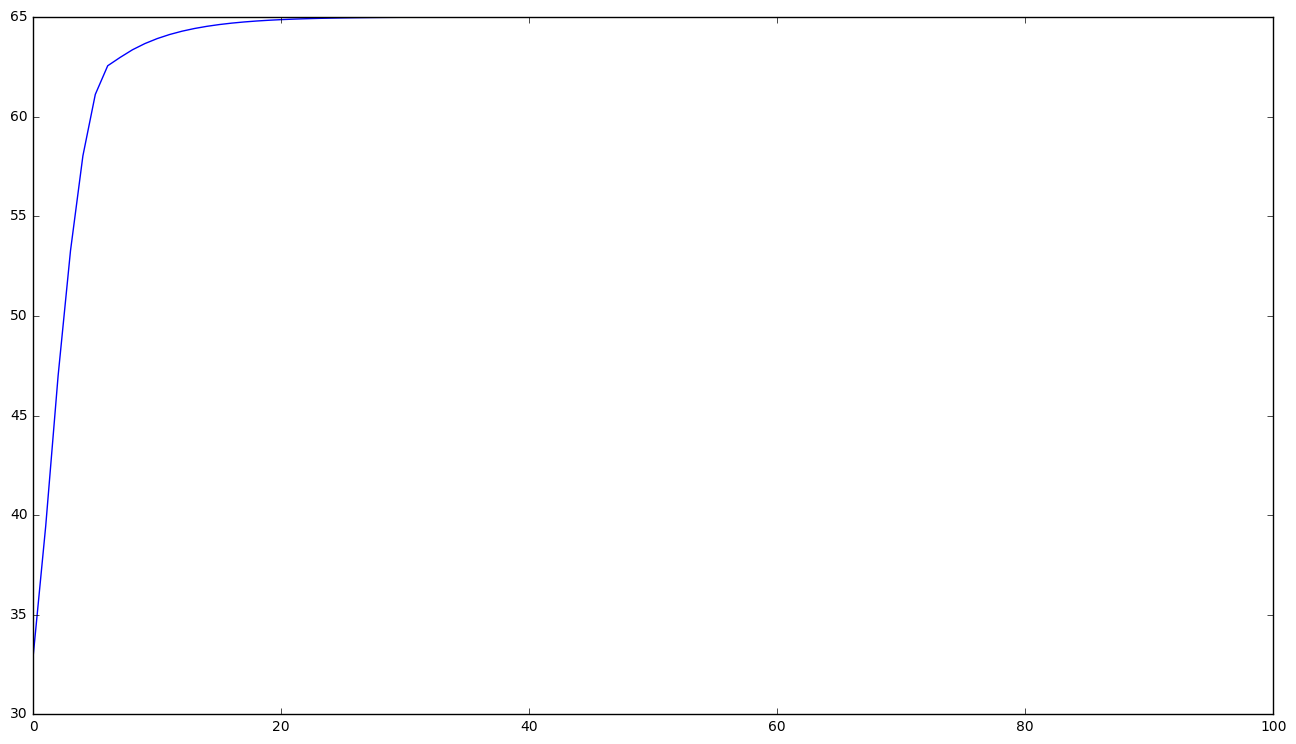

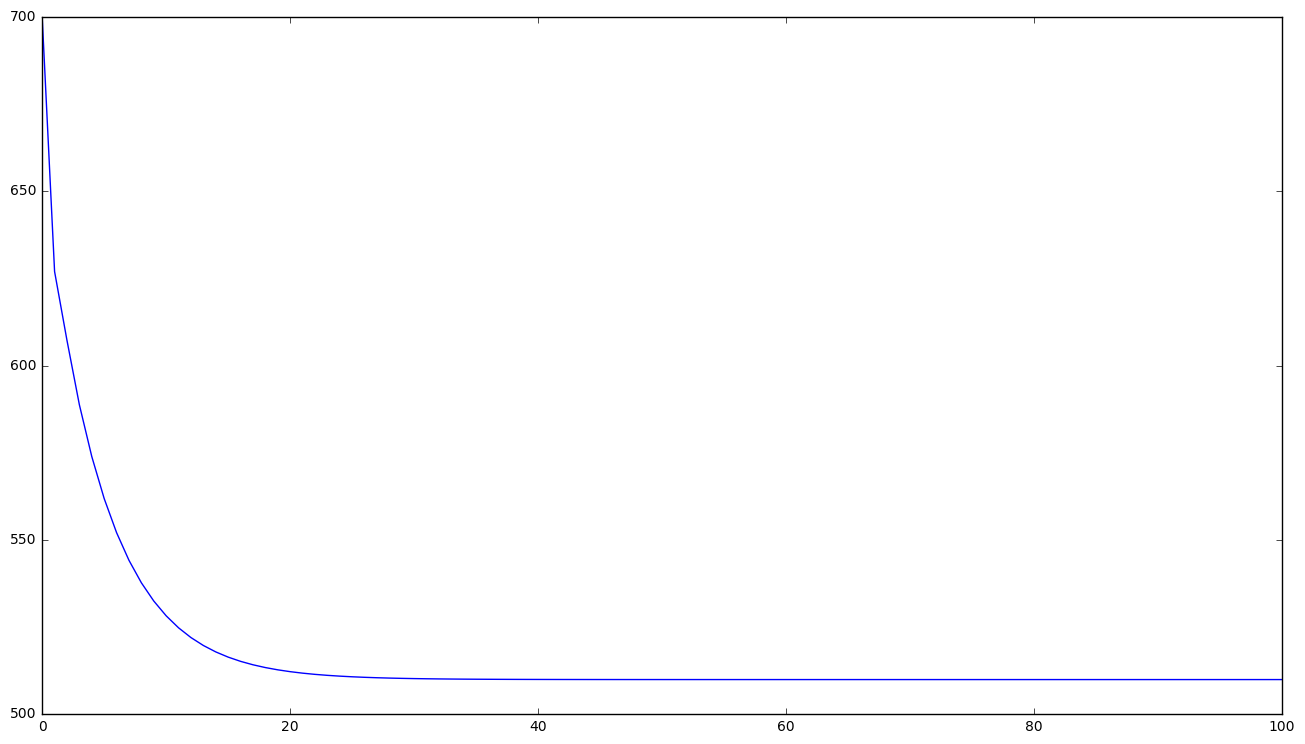

In [72]:
for measurements in T.T:
    plt.figure(figsize=(16,9))
    plt.plot(range(101),measurements)